# EAE 127 - Project 2

Chung Yin Leung (998238900)

---

### Introduction

This project examines three different topics in Aerodynamics: the calculation of altitude and airspeed on an aircraft, the calculation of drag from a wake, and an examination of boundary layer properties. From this project, altitude and airspeed can be calculated from fluid properties obtained from sensors installed on an aircraft. Drag on any object can be calculated by obtaining the wake's velocity distribution. And lastly, the length of an object and fluid properties can greatly affect the boundary layer properties.

---

### Problem 1 - Altitude and Airspeed

##### Approach

I am given the altitude of an aircraft as $4500$ $ft$ above sea level, and I am asked to find the static pressure sensed by the transducer. The static pressure can be obtained from Appendix E in Anderson's Fundamentals of Aerodynamics using the given altitude.

I am also given the stagnation pressure sensed by a Pitot tube, and I am asked to find the airspeed of the aircraft. Equation 3.34 from Anderson's Fundamentals of Aerodynamics can be used to calculate the airspeed. The equation requires the stagnation pressure, static pressure, and density. The stagnation pressure is given as $1813$ $\frac{lb}{ft^2}$, the static pressure and density can be found from Appendix E.

##### Equations

Equation used for Problem 1:

\begin{equation}
V_1 = \sqrt{\frac{2(p_0 - p_1)}{\rho}}
\end{equation}

This equation is derived from Bernoulli's Equation with one point in the free stream and another point at the stagnation point. The equation is then solved for free stream velocity in order to obtain the above equation where $\rho$ is density, $p_0$ is the stagnation pressure, $p_1$ is the static pressure, and $V_1$ is the free stream velocity. The free stream velocity equals the airspeed for an aircraft.

##### Code and Results

From Appendix E, at an altitude of $4500$ $ft$ above sea level, the static pressure is $1794.1$ $\frac{lb}{ft^2}$ and the density is $2.0794(10^{-3})$ $\frac{slugs}{ft^3}$.

In [1]:
p1 = 1794.1 #Static pressure
rho = 2.0794*(10**-3) #Density

p0 = 1813 #Stagnation pressure

#Calculates airspeed according to equation
v1 = (2*(p0-p1)/rho)**(1/2)
print('The airspeed is', v1, 'ft/s.')


The airspeed is 134.82700274582965 ft/s.


The calculated airspeed is $134.83$ $\frac{ft}{s}$.

---

### Problem 2 - Drag from a Wake Velocity Distribution

##### Approach

I am given x-components of velocity profiles $1.25$ units above and below an airfoil's chord line, and before and after the airfoil. I am asked to calculate the drag on the airfoil. Equation 2.84 from Anderson's Fundamentals of Aerodynamics can be used to calculate the drag. The flow is assumed to be incompressible with a constant air density of $1.2$ $\frac{kg}{m^2}$. From the data, the free stream x-direction velocity profile ($u_0$) is constant at $1.0$ $\frac{m}{s}$, and only the wake velocity profile ($u_1$) is varying with $z$. In order to increase accuracy, I am also asked to fit the wake velocity profile's data points on to a polynomial function to integrate with greater accuracy. Because $u_0$ is constant, only $u_1$ will be fitted.

numpy's *polyfit* function will generate coefficients to a polynomial of a given degree. Using the coefficients, a large amount of values of the polynomial within the given $z$ range are generated. Plots of the 2nd, 4th, 6th, and 8th degree polynomial will be compared to determine the best fit for the given data.

After determining the best fit, Equation 2.84 is used to calculate the drag. This equation requires an integration that will be done numerically using the trapezoid rule.

##### Equations

Equation used for Problem 2:

\begin{equation}
D' = \rho_1 \int^b_h{u_1(u_0-u_1)dy}
\end{equation}

Simplified by setting $u_0$ as $1.0$:

\begin{equation}
D' = \rho_1 \int^b_h{u_1(1.0-u_1)dy}
\end{equation}

The final equation calculates drag per unit span ($D'$) for an airfoil given the wake velocity profile ($u_1$) and constant air density ($\rho_1$).

Trapezoid Rule:

\begin{equation}
\int_{a}^{b} f(x)\, dx \approx \sum_{k=1}^{N} \frac{1}{2}\left(x_{k+1} - x_k\right)\left( f(x_{k+1}) + f(x_{k})\right)
\end{equation}

The trapezoid rule is used to numerically integrate $f(x)$ over the range $a$ to $b$.

##### Code and Results

The follow code imports needed libraries and loads the given data:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

#Loads the data into z, u0, u1
z, u0, u1 = np.genfromtxt('WakeVelocityDistribution.dat',delimiter=',',unpack=True)


The following code defines a function that returns values of a polynomial over an absolute range that can be translated:

In [3]:
def vpoly(coef,n,ra,tr):
    deg = len(coef) - 1
    zr = ra*(np.array(range(0,n+1))/n) - tr #Sets range and translates
    p = np.zeros(n+1)
    for i in range(0,n+1):
        for g in range(0,deg + 1):
            p[i] = p[i] + coef[g]*zr[i]**(deg - g)
    return zr, p

The following code generates coefficients of several polynomials of certain degrees that fits the given $u_2$ data. Using the coefficients and the function above, values of the polynomial are evaluated. Then the results and a linear spline of the given $u_2$ data are plotted:

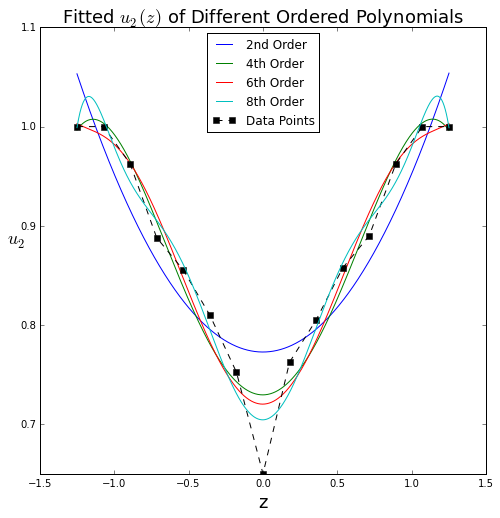

In [4]:
#Use numpy's polyfit to generate polynomial fit
cp2 = np.polyfit(z,u1,2)
cp4 = np.polyfit(z,u1,4)
cp6 = np.polyfit(z,u1,6)
cp8 = np.polyfit(z,u1,8)

#Number of points to evaluate 
n = 1000

#Obtain polynomial values
zr, p2 = vpoly(cp2,n,2.5,1.25)
zr, p4 = vpoly(cp4,n,2.5,1.25)
zr, p6 = vpoly(cp6,n,2.5,1.25)
zr, p8 = vpoly(cp8,n,2.5,1.25)

#Plots
pl.figure(figsize=(8,8))
a, b, c, d, e = pl.plot(zr, p2, zr, p4, zr, p6, z, u1,'k--s', zr, p8)
pl.title('Fitted $u_2(z)$ of Different Ordered Polynomials',fontsize = 18)
pl.xlabel('z',fontsize = 18)
pl.ylabel('$u_2$',fontsize = 18,rotation='horizontal')
pl.legend((a,b,c,e,d),('2nd Order','4th Order','6th Order','8th Order','Data Points'),loc=9)
pl.show()

**Figure 1: Fitted $u_2(z)$ of Different Ordered Polynomials**

Figure 1 contains a plot of the 2nd, 4th, 6th, and 8th degree polynomials, and the data points. From Figure 1, the 6th degree polynomial fits closest to the data points. The 8th degree polynomial overshoots at the ends while the other lower degree polynomials do not fit as close to the data points.

The following code defines a function that will numerically integrate a given function over a range of $x$ values by using the trapezoidal rule. Using the defined function and Equation 2.84, the drag is found by numerical integration.

In [5]:
#Function for Trapezoidal integration
def trap_int(fcn, x):
    inte = 0
    for i in range(0,len(x) - 1):
        inte = inte + 0.5*(fcn[i] + fcn[i+1])*(x[i+1] - x[i])
    return inte

rho = 1.2
fcn = [x*(1 - x) for x in p6]
drag = rho*trap_int(fcn,zr)
print('The drag is', drag, 'N/m.')

drag2 = trap_int(rho*u1*(1-u1),z)
print('The drag with the original data is', drag2, 'N/m.')

The drag is 0.307484827134 N/m.
The drag with the original data is 0.304514892857 N/m.


The calculated drag is $0.3075$ $\frac{N}{m}$ with a 6-degree polynomial.

Calculating the integral by numerically integrating the original data results in a drag of $0.3045$ $\frac{N}{m}$.

---

### Problem 3 - Boundary Layer Velocity Distribution and Displacement and Momentum Thickness

##### Approach

I am given three flow conditions:
- a flat plate, laminar flow, reference length of $1$ $ft$, altitude of $0$ $ft$, and velocity of $40$ $\frac{mi}{h}$, and
- a Cessna 150, turbulent flow, reference length of $24$ $ft$, altitude of $10000$ $ft$, and velocity of $94$ $\frac{mi}{h}$, and
- a Boeing 747, turbulent flow, reference length of $232$ $ft$, altitude of $35000$ $ft$, and velocity of $570$ $\frac{mi}{h}$.

I am asked to plot the boundary layer (BL) velocity distribution $\left(\frac{u}{u_e}\right)$ for a laminar flow over a flat plate and a turbulent flow over a full-scale aircraft. The equation for $\frac{u}{u_e}$ for a laminar flow over a flat plate is assumed to be parabolic. The equation for $\frac{u}{u_e}$ for the second case is given as a one-seventh power relationship with vertical distance ($y$) non-dimensionalized by the boundary layer thickness ($\delta$). 

I am also asked to calculate non-dimensionalized displacement thickness ($\delta^*$) and non-dimensionalized momentum thickness ($\theta$) using $\frac{u}{u_e}$ and incompressible forms of equations 17.9 and 17.10 from Anderson's Fundamentals of Aerodynamics. The displacement and momentum thicknesses are non-dimensionalized by $\delta$ so that multiplying the calculated non-dimensionalized $\delta^*$ and $\theta$ by $\delta$ will result in the actual thicknesses. Because $\delta$ varies with $x$, $\delta^*$ and $\theta$ will also vary with $x$. Because of that, I am also asked to plot $\delta^*$ and $\theta$ versus $x$.


My approach is to define all the given equations as functions in Python. For the BL velocity distribution, I will generate a large amount of $\frac{y}{\delta}$ from 0 to 1 and generate the values for the BL velocity distribution over that range. Together, the generated values can plot the BL velocity distribution.

Using the generated BL velocity distribution values, I can calculate the non-dimensionalized displacement and momentum thicknesses by calculating the function inside the integrals and numerically integrate using the trapezoid rule. Next, a set of $x$-values over the length of a flow condition is generated. The displacement thickness is calculated using the corresponding boundary layer thickness equation for either a laminar flow over a flat plate or a turbulent flow over a flat plate. The equations require fluid properties that are obtained using Appendix E in Anderson's Fundamentals of Aerodynamics and an equation from White's Fluid Mechanics. Using the BL thickness values, values of the displacement thickness and momentum thickness are generated across the range between 0 and the length of the flow condition. These values are used to generate the plots for displacement thickness and momentum thickness for each flow condition.

##### Equations

This is the given boundary layer velocity profile for a laminar flow over a flat plate:
\begin{equation}
\frac{u}{u_e} = \left(2\frac{y}{\delta} - \frac{y^2}{\delta^2}\right)
\end{equation}


This is the given boundary layer velocity profile for a turbulent flow over a full-scale aircraft:
\begin{equation}
\frac{u}{u_e} = \left(\frac{y}{\delta}\right)^{\frac{1}{7}}
\end{equation}

$\frac{u}{u_e}$ is the non-dimensionalized velocity distribution, and $\frac{y}{\delta}$ is the non-dimensionalized distance from the surface.

Displacement thickness equation for an incompressible flow. This is also Equation 17.9 from Anderson's Fundamentals of Aerodynamics with the density terms canceled out:
\begin{equation}
\delta^* = \int^\delta_0 \left(1-\frac{u}{u_e}\right)dy
\end{equation}

Momentum thickness equation for an incompressible flow. This is also Equation 17.10 from Anderson's Fundamentals of Aerodynamics with the density terms canceled out:

\begin{equation}
\theta = \int^\delta_0 \frac{u}{u_e}\left(1-\frac{u}{u_e}\right)dy
\end{equation}


Reynold's number at a distance x from the edge of a flat plate:

\begin{equation}
Re_x = \frac{\rho_{\infty} V_{\infty}x}{\mu_{\infty}}
\end{equation}

$\rho$ is the free stream density, $V$ is the free stream velocity, and $\mu$ is the free stream dynamic viscosity.

Laminar Flat Plate Boundary Layer Thickness Equation 18.23 from Anderson's Fundamentals of Aerodynamics:

\begin{equation}
\delta = \frac{5.0x}{\sqrt{Re_x}} = 5.0 \sqrt{ \frac{ \mu_{\infty} }{ \rho_{\infty} V_{\infty}}} x^{1/2}
\end{equation}


Turbulent Flat Plate Boundary Layer Thickness Equation 19.1 from Anderson's Fundamentals of Aerodynamics:

\begin{equation}
\delta = \frac{0.37x}{Re_x^{1/5}} = 0.37 \left(\frac{ \mu_{\infty} }{ \rho_{\infty} V_{\infty}}\right)^{1/5} x^{4/5}
\end{equation}


Sutherland law for Dynamic Viscosity Equation for Air at standard pressure from Appendix A of White's Fluid Mechanics, where $u_0$ is $1.71(10^-7)$ $\frac{kg}{mg*s}$, $T_0$ is $273$ $K$, $S_{air}$ is $110.4$ $K$:

\begin{equation}
\mu \approx \mu_0 \left(\frac{T}{T_0}\right)^{3/2}\left(\frac{T_0 + S}{T + S}\right)
\end{equation}

##### Code and Results

The following code defines each of the above equations, except for Reynold's number, as a function in Python:

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

#Functions for Equations

#BL velocity dist eqn. for laminar flow
def lam_pl(y_d):
    u_ue = 2*y_d - y_d**2
    return u_ue

#BL velocity dist eqn. for turbulent flow
def turb_ac(y_d):
    u_ue = y_d**(1/7)
    return u_ue

#Function in Displacement thickness integral
def disp_th(u_ue):
    disp_th = 1 - u_ue
    return disp_th

#Function in Momentum thickness integral
def mom_th(u_ue):
    mom_th = u_ue*(1-u_ue)
    return mom_th

#Laminar BL thickness eqn.
def lam_th(x,mu,rho,V):
    lth = 5.0*((mu/(rho*V))**(1/2))*x**(1/2)
    return lth

#Turbulent BL thickness eqn.
def tur_th(x,mu,rho,V):
    tth = 0.37*((mu/(rho*V))**(1/5))*x**(4/5)
    return tth

#Dynamic viscosity eqn., expects Rankine Temp
def mu(T):
    T = T/1.8 #Converts to Kelvin
    mu_0 = 1.71*10**(-5) #in kg/(m*s)
    T_0 = 273 #in K
    S = 110.4 #Sutherland's constant for air in Kelvin
    mu = mu_0*((T/T_0)**(3/2))*(T_0 + S)/(T + S)
    mu = mu*((3.7373*10**(-7))/(1.7894*10**(-5))) #Converts to Imperial Units
    return mu

The following code calculates and plots $u/u_e$ for both cases:

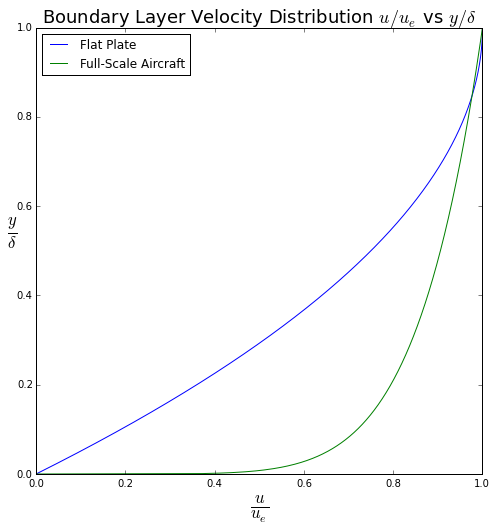

In [7]:
#Generate y/delta values
y_d = np.linspace(0,1,1000)

#Calculate u/ue for both cases
u_ue_lpl = lam_pl(y_d)
u_ue_tac = turb_ac(y_d)

#Plots
pl.figure(figsize = (8,8))
a, b = pl.plot(u_ue_lpl,y_d, u_ue_tac,y_d)
pl.title('Boundary Layer Velocity Distribution $u/u_e$ vs $y/\delta$',fontsize = 18)
pl.xlabel('$\\frac{u}{u_e}$',fontsize = 24)
pl.ylabel('$\\frac{y}{\delta}$',fontsize = 24,rotation='horizontal')
pl.legend((a,b),('Flat Plate','Full-Scale Aircraft'),loc=2)
pl.show()

**Figure 2: Boundary Layer Velocity Distribution for a Flat Plate and Full-Scale Aircraft**

Figure 2 shows the boundary layer velocity distribution for both a flat plate and a full-scale aircraft. The flat plate's velocity distribution is plotted in blue while the full-scale aircraft's velocity distribution is plotted in green. The turbulent flow approaches free stream velocity faster than laminar flow as $y$ increases.

The following code calculates the non-dimensionalized displacement thickness and momentum thickness for both cases:

In [8]:
#Calculates displacement thickness for both laminar and turbulent cases
#Laminar
dis_lpl_fcn = disp_th(u_ue_lpl)
dis_lpl = trap_int(dis_lpl_fcn, y_d)
#Turbulent
dis_tac_fcn = disp_th(u_ue_tac)
dis_tac = trap_int(dis_tac_fcn, y_d)

#Calculates momentum thickness for both laminar and turbulent cases
#Laminar
mom_lpl_fcn = mom_th(u_ue_lpl)
mom_lpl = trap_int(mom_lpl_fcn, y_d)
#Turbulent
mom_tac_fcn = mom_th(u_ue_tac)
mom_tac = trap_int(mom_tac_fcn, y_d)

print('For a laminar flow over a flat plate:')
print('Non-dimensionalized displacement thickness:',dis_lpl)
print('Non-dimensionalized momentum thickness:',mom_lpl)
print('For a turbulent flow over a full-scale aircraft:')
print('Non-dimensionalized displacement thickness:',dis_tac)
print('Non-dimensionalized momentum thickness:',mom_tac)

For a laminar flow over a flat plate:
Non-dimensionalized displacement thickness: 0.333333500334
Non-dimensionalized momentum thickness: 0.133333166333
For a turbulent flow over a full-scale aircraft:
Non-dimensionalized displacement thickness: 0.125144277664
Non-dimensionalized momentum thickness: 0.0971198231881


For a laminar flow over a flat plate:

$\delta^*/\delta$$=$ $0.3333$

$\theta/\delta$ $=$ $0.1333$

For a turbulent flow over a full-scale aircraft:

$\delta^*/\delta$ $=$ $0.1251$

$\theta/\delta$ $=$ $0.09712$

The following code initializes the fluid properties of each flow conditions and calculates the dimensionalized displacement thickness and momentum thickness for each condition:

In [9]:
#Flat plate
L_pl = 1 #Length in ft
V_pl = 40*5280/(60*60) #Velocity in ft/s
T_pl = 518.69 #Temperature in Rankine
rho_pl = 2.3769*10**(-3) #Density in slugs/ft^3
mu_pl = mu(T_pl) #Dynamic viscosity in slugs/(ft*s)

#Cessna 150
L_C150 = 24
V_C150 = 94*5280/(60*60)
T_C150 = 483.04
rho_C150 = 1.7556*10**(-3)
mu_C150 = mu(T_C150)

#Boeing 747
L_B747 = 232
V_B747 = 570*5280/(60*60)
T_B747 = 394.08
rho_B747 = 7.3820*10**(-4)
mu_B747 = mu(T_B747)

In [10]:
#Flat Plate
x_pl = np.linspace(0,L_pl,1000) #x-value vector from 0 to end of length
bl_pl = lam_th(x_pl,mu_pl,rho_pl,V_pl) #Calculates boundary layer thickness at generated x-values
dth_pl = dis_lpl*bl_pl #Calculates displacement thickness at those x-values
mth_pl = mom_lpl*bl_pl #Calculates momentum thickness at those x-values

#Cessna 150
x_C150 = np.linspace(0,L_C150,1000)
bl_C150 = lam_th(x_C150,mu_C150,rho_C150,V_C150)
dth_C150 = dis_tac*bl_C150
mth_C150 = mom_tac*bl_C150

#Boeing 747
x_B747 = np.linspace(0,L_B747,1000)
bl_B747 = lam_th(x_B747,mu_B747,rho_B747,V_B747)
dth_B747 = dis_tac*bl_B747
mth_B747 = mom_tac*bl_B747

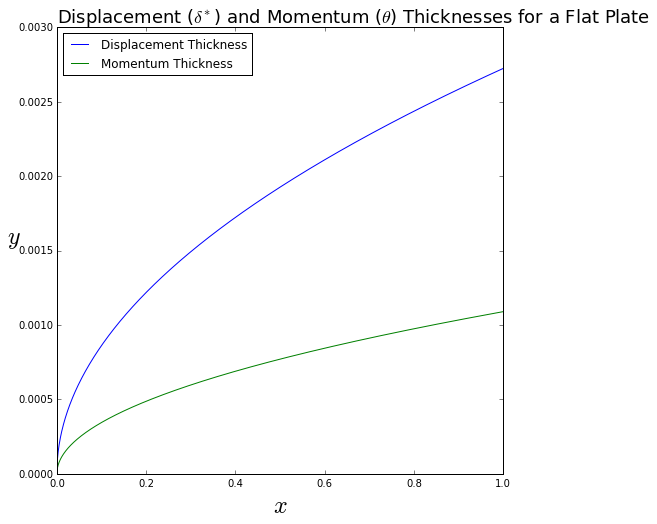

In [11]:
#Plots
pl.figure(figsize = (8,8))
a, b = pl.plot(x_pl,dth_pl,x_pl,mth_pl)
pl.title('Displacement ($\delta^*$) and Momentum ($\\theta$) Thicknesses for a Flat Plate',loc='left',fontsize = 18)
pl.xlabel('$x$',fontsize = 24)
pl.ylabel('$y$',fontsize = 24,rotation='horizontal')
pl.legend((a,b),('Displacement Thickness','Momentum Thickness'),loc=2)
pl.show()

**Figure 3: Displacement and Momentum Thicknesses for a Flat Plate**

Figure 3 shows a plot of the calculated displacement and momentum thicknesses for a flat plate. The blue line represents displacement thickness while the green line represents momentum thickness.

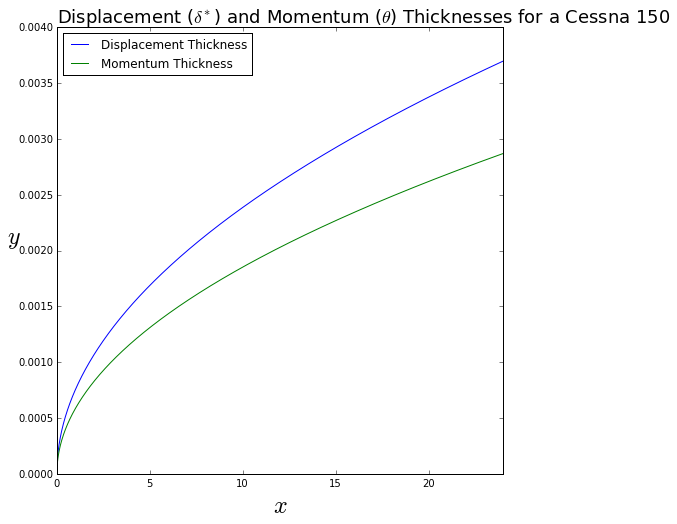

In [12]:
#Plots
pl.figure(figsize = (8,8))
a,b = pl.plot(x_C150,dth_C150,x_C150,mth_C150)
pl.title('Displacement ($\delta^*$) and Momentum ($\\theta$) Thicknesses for a Cessna 150',loc='left',fontsize = 18)
pl.xlabel('$x$',fontsize = 24)
pl.ylabel('$y$',fontsize = 24,rotation='horizontal')
pl.xlim(xmax=24)
pl.legend((a,b),('Displacement Thickness','Momentum Thickness'),loc=2)
pl.show()

**Figure 4: Displacement and Momentum Thicknesses for a Cessna 150**

Figure 4 shows a plot of the calculated displacement and momentum thicknesses for a Cessna 150. The blue line represents displacement thickness while the green line represents momentum thickness. Here, the ratio of displacement thickness to momentum thickness is higher than the other cases.

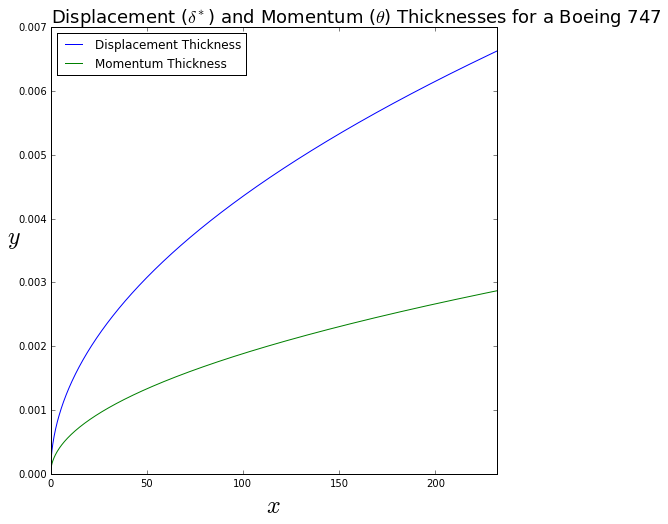

In [13]:
#Plots
pl.figure(figsize = (8,8))
a,b = pl.plot(x_B747,dth_B747,x_B747,mth_C150)
pl.title('Displacement ($\delta^*$) and Momentum ($\\theta$) Thicknesses for a Boeing 747',loc='left',fontsize = 18)
pl.xlabel('$x$',fontsize = 24)
pl.ylabel('$y$',fontsize = 24,rotation='horizontal')
pl.xlim(xmax=232)
pl.legend((a,b),('Displacement Thickness','Momentum Thickness'),loc=2)
pl.show()

**Figure 5: Displacement and Momentum Thicknesses for a Boeing 747**

Figure 5 shows a plot of the calculated displacement and momentum thicknesses for a Boeing 747. The blue line represents displacement thickness while the green line represents momentum thickness.

---

### Conclusions

Using pressures obtained through sensors, an aircraft can determine its current altitude and airspeed. However, the aircraft needs access to a table of pressures and densities that corresponds to the altitude. This could be a database or an equation fitted to the table in order. Both require a computer. So an aircraft requires computers to calculate its altitude and airspeed using the method presented in Problem 1.

Secondly, the drag on an airfoil can be obtained by only knowing the velocity distribution in the wake generated by the airfoil. This method allows drag on a complicated airfoil to be calculated and avoids complications in trying to find friction. In addition, the drag obtained by numerically integrating the original data versus the drag obtained by numerically integrating the poly-fitted data agrees to two significant figures. The increased accuracy from using the poly-fitted data is not very high.

Lastly, the boundary layer properties are affected by both the flow properties and the object's properties. A laminar flow will generate a slower velocity distribution than a turbulent flow. Turbulent flow generates thinner displacement and momentum thicknesses per unit boundary layer thickness than laminar flow. And the exact values for the displacement thickness and momentum thickness increase as the length of an object increases. However, comparing the Cessna 150 and Boeing 747 calculations, as velocity increases, the displacement thickness increases while the momentum thickness decreases.